In [2]:
import pandas as pd 
import seaborn as sn

In [6]:
data = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [9]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [11]:
data.isnull()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False


In [13]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [17]:
#Drop serial no as it not require
data.drop(['Serial No.'], axis=1, inplace=True)

In [50]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Research'] = label_encoder.fit_transform(data['Research'])


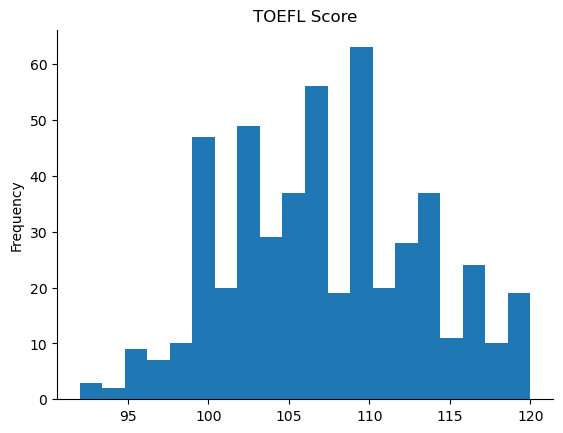

In [49]:
from matplotlib import pyplot as plt
data['TOEFL Score'].plot(kind='hist', bins=20, title='TOEFL Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [21]:
#To convert chance of admit float  to binary format(0/1)
data['Admitted']=data['Chance of Admit '] > 0.73
data['Admitted']=data['Admitted'].astype(int)

In [23]:
#NOW need only GRE score and CGPA
X = data[['GRE Score','CGPA']]
Y = data['Admitted']

In [44]:
#SPLIT THE DATASET(TRAIN_TEST SPLIT)
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test=train_test_split(X,Y,test_size=0.4,random_state=42)

In [45]:
#TRain decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# to Train
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=42)

In [46]:
#EVALUATE THE MODEL
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#To predict
Y_pred=clf.predict(X_test)

print('Accuracy:',accuracy_score(Y_test,Y_pred))
print("confusion Matrix:\n", confusion_matrix(Y_test,Y_pred))
print("classification report:\n", classification_report(Y_test,Y_pred))


Accuracy: 0.815
confusion Matrix:
 [[94 26]
 [11 69]]
classification report:
               precision    recall  f1-score   support

           0       0.90      0.78      0.84       120
           1       0.73      0.86      0.79        80

    accuracy                           0.81       200
   macro avg       0.81      0.82      0.81       200
weighted avg       0.83      0.81      0.82       200



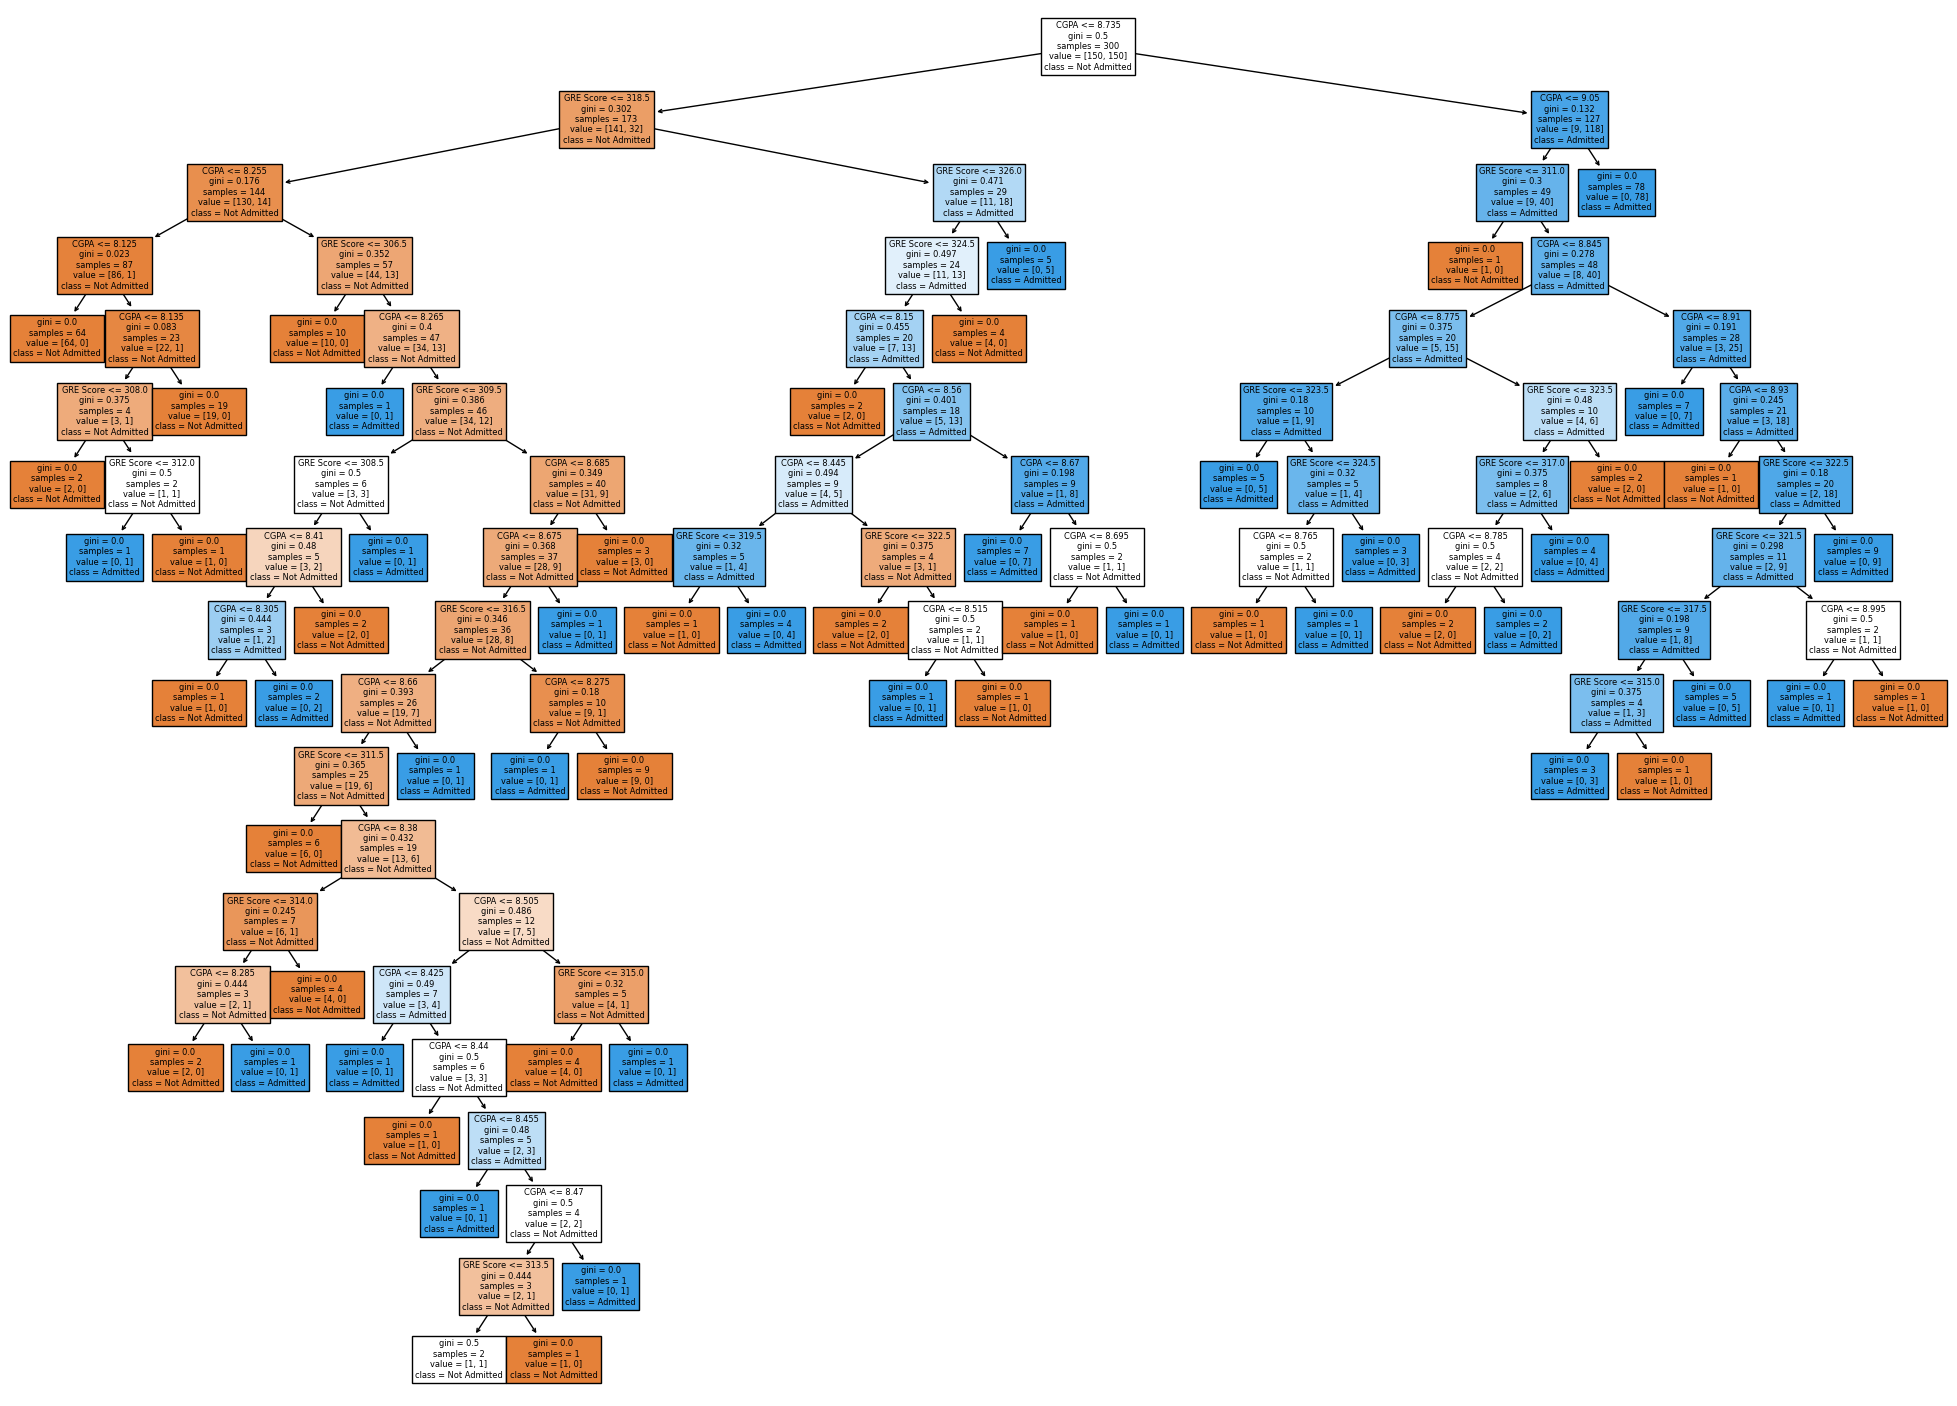

In [57]:
#VISUALIZATION OF DECISION TREE
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(25,18))
plot_tree(clf,feature_names=['GRE Score','CGPA'],class_names=['Not Admitted', 'Admitted'],filled=True)
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

print("Mean Square Error:  ",mean_squared_error(Y_test,Y_pred))
print("Mean Absolute Error: ",mean_absolute_error(Y_test,Y_pred))
print("R-Sqaure : ",r2_score(Y_test,Y_pred))

Mean Square Error:   0.185
Mean Absolute Error:  0.185
R-Sqaure :  0.22916666666666663
